<a href="https://colab.research.google.com/github/ryzhokhina/Tensorflow-Dev-Exam-Preparation/blob/main/ReLU_in_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

## Sigmoid and Tanh

In [9]:
def sigmoid(x):
  return 1.0/(1.0+ np.exp(-x))

In [13]:
sigmoid(10)

0.9999546021312976

In [14]:
x = np.linspace(-7,7,200)

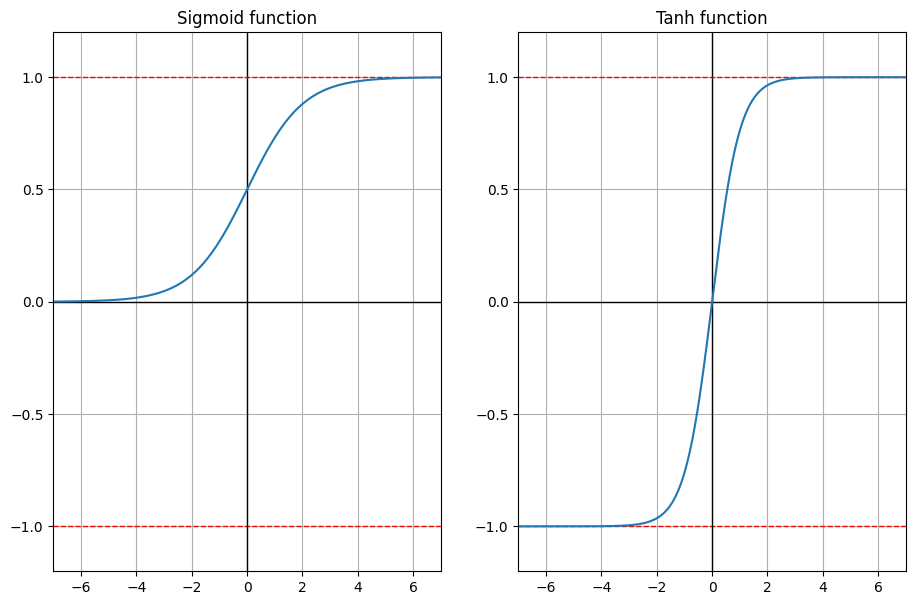

In [32]:
plt.figure(figsize = (11,7))

plt.subplot(1,2,1)
# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([-7, 7], [-1, -1], 'r--', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot([-7,7], [1,1], 'r--', linewidth=1)

plt.plot(x, sigmoid(x))
plt.grid(True)
plt.axis([-7,7,-1.2,1.2])
plt.title("Sigmoid function")

plt.subplot(1,2,2)

# coordinate 
plt.plot([-7, 7], [0, 0], 'k-', linewidth=1)
plt.plot([-7, 7], [-1, -1], 'r--', linewidth=1)
plt.plot([0, 0], [-2.2, 3.2], 'k-', linewidth=1)
plt.plot([-7,7], [1,1], 'r--', linewidth=1)

plt.title("Tanh function")
plt.plot(x, np.tanh(x))
plt.axis([-7,7,-1.2,1.2])
plt.grid(True)
plt.show()


## Derivate of functions

In [37]:
def dev_sigmoid(x):
  return sigmoid(x)*(1-sigmoid(x))

In [34]:
def dev_tanh(x):
  return 1- np.tanh(x)**2

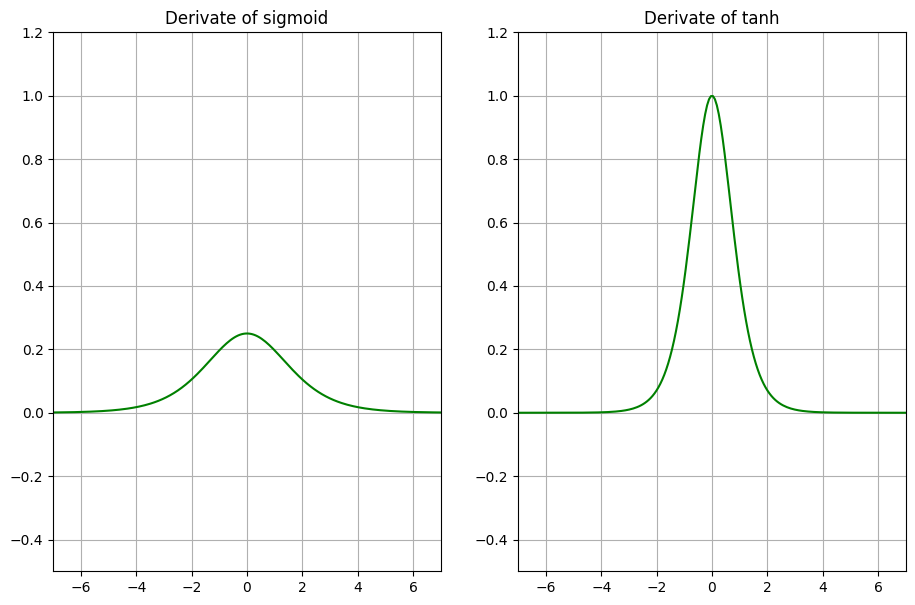

In [52]:
plt.figure(figsize = (11,7))


plt.subplot(1,2,1)
plt.plot(x, dev_sigmoid(x),'-g')
plt.title("Derivate of sigmoid")
plt.axis([-7, 7, -0.5, 1.2])
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(x, dev_tanh(x),'-g')
plt.title("Derivate of tanh")
plt.axis([-7, 7, -0.5, 1.2])
plt.grid(True)
plt.show()

##Fashion MMIST dataset

In [72]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [73]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

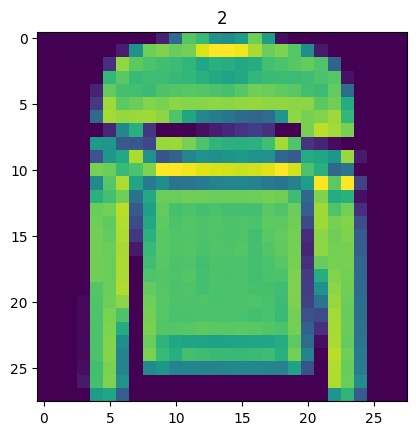

In [74]:
plt.imshow(x_train[5])
plt.title(y_train[5])
plt.show()

In [75]:
import pandas as pd
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

In [76]:
x_train[1].max(), x_train[1].min()

(255, 0)

### Training a deep NN with ReLU
Let's first build a deep NN with ReLU and default kernel_initializer

In [77]:
x_train = x_train/255
x_test = x_test/255

In [78]:
60000*0.2

12000.0

In [80]:
x_val = x_train[:1000]
y_val = y_train[:1000]

x_train = x_train[1000:]
y_train = y_train[1000:]

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((59000, 28, 28), (59000,), (1000, 28, 28), (1000,))